In [3]:
!pip install pydataset


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pydataset import data

In [5]:
plt.close('all') # old figures stay in memory, and if you do plt.show() without closing them, all the figures may be shown at once or eat up memory

In [6]:
print(data())

        dataset_id                                             title
0    AirPassengers       Monthly Airline Passenger Numbers 1949-1960
1          BJsales                 Sales Data with Leading Indicator
2              BOD                         Biochemical Oxygen Demand
3     Formaldehyde                     Determination of Formaldehyde
4     HairEyeColor         Hair and Eye Color of Statistics Students
..             ...                                               ...
752        VerbAgg                  Verbal Aggression item responses
753           cake                 Breakage Angle of Chocolate Cakes
754           cbpp                 Contagious bovine pleuropneumonia
755    grouseticks  Data on red grouse ticks from Elston et al. 2001
756     sleepstudy       Reaction times in a sleep deprivation study

[757 rows x 2 columns]


In [7]:
','.join(data().dataset_id)

'AirPassengers,BJsales,BOD,Formaldehyde,HairEyeColor,InsectSprays,JohnsonJohnson,LakeHuron,LifeCycleSavings,Nile,OrchardSprays,PlantGrowth,Puromycin,Titanic,ToothGrowth,UCBAdmissions,UKDriverDeaths,UKgas,USAccDeaths,USArrests,USJudgeRatings,USPersonalExpenditure,VADeaths,WWWusage,WorldPhones,airmiles,airquality,anscombe,attenu,attitude,austres,cars,chickwts,co2,crimtab,discoveries,esoph,euro,faithful,freeny,infert,iris,islands,lh,longley,lynx,morley,mtcars,nhtemp,nottem,npk,occupationalStatus,precip,presidents,pressure,quakes,randu,rivers,rock,sleep,stackloss,sunspot.month,sunspot.year,sunspots,swiss,treering,trees,uspop,volcano,warpbreaks,women,acme,aids,aircondit,aircondit7,amis,aml,bigcity,brambles,breslow,calcium,cane,capability,catsM,cav,cd4,channing,city,claridge,cloth,co.transfer,coal,darwin,dogs,downs.bc,ducks,fir,frets,grav,gravity,hirose,islay,manaus,melanoma,motor,neuro,nitrofen,nodal,nuclear,paulsen,poisons,polar,remission,salinity,survival,tau,tuna,urine,wool,aids,alloauto

In [8]:
df = data('mtcars')
df.head(2)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4


In [9]:
df.tail(2)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8
Volvo 142E,21.4,4,121.0,109,4.11,2.78,18.6,1,1,4,2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 3.0+ KB


In [11]:
df.shape

(32, 11)

In [12]:
df.dtypes

mpg     float64
cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object

In [13]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [14]:
df.groupby('cyl')['mpg'].mean().reset_index()

,cyl,mpg
0,4,26.663636
1,6,19.742857
2,8,15.100000


In [33]:
mtcars.groupby('vs').agg({'wt':['mean', 'median', 'min' , 'max']})

wt                      
        mean  median    min    max
vs                                
0   3.688556  3.5700  2.140  5.424
1   2.611286  2.6225  1.513  3.460

In [37]:
mtcars['mpg'].agg(['sum', 'count', 'min', 'max'])

sum      642.9
count     32.0
min       10.4
max       33.9
Name: mpg, dtype: float64

In [15]:
mtcars = data('mtcars')
mtcars.head(2)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4


In [16]:
mtcars = mtcars.astype({'gear':'category'}) #converts the 'gear' column to a categorical data type for uses less memory than strings or integers
mtcars.head(2)
mtcars.dtypes

mpg      float64
cyl        int64
disp     float64
hp         int64
drat     float64
wt       float64
qsec     float64
vs         int64
am         int64
gear    category
carb       int64
dtype: object

In [17]:
print(mtcars.columns)

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')


<AxesSubplot:xlabel='wt', ylabel='mpg'>

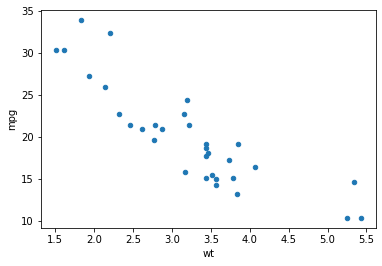

In [18]:
mtcars.plot.scatter('wt','mpg')

<AxesSubplot:xlabel='wt', ylabel='mpg'>

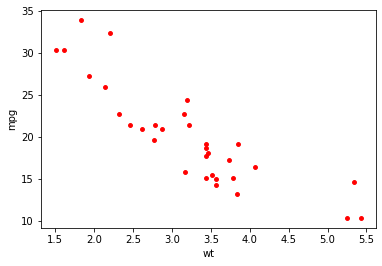

In [19]:
mtcars.plot.scatter('wt','mpg', s = 15 , c = 'red') # s = size , c = color


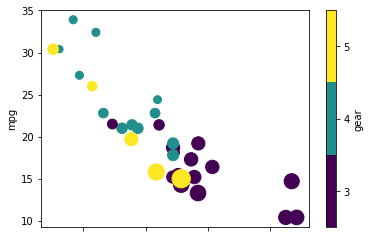

In [20]:
mtcars.plot.scatter(x = 'wt', y = 'mpg',c = 'gear', s = 'hp', colormap = 'viridis');

<AxesSubplot:xlabel='wt', ylabel='mpg'>

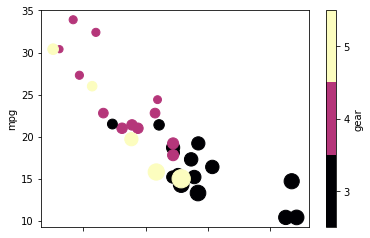

In [21]:
mtcars.plot.scatter(x = 'wt', y = 'mpg', c = 'gear', s = 'hp', colormap = 'magma')

In [22]:
mtcars.gear.value_counts() #3,4,5 is index and 15,12,5 is the values

3    15
4    12
5     5
Name: gear, dtype: int64

<AxesSubplot:>

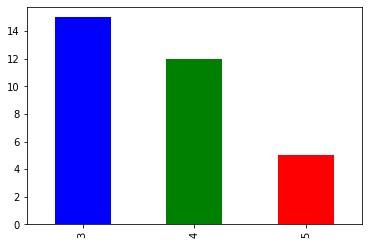

In [23]:
mtcars.gear.value_counts().plot.bar(color = ['blue', 'green', 'red'])

<AxesSubplot:ylabel='gear'>

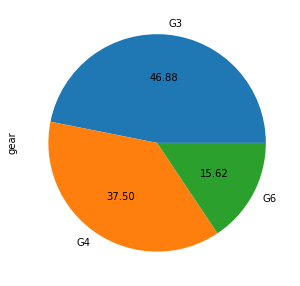

In [24]:
mtcars.gear.value_counts()
mtcars.gear.value_counts().plot.pie(figsize = (5,5), autopct = '%.2f', labels = ['G3', 'G4', 'G6'])